In [32]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
#from google.colab import drive
#import zipfile
#import seaborn as sns
#import spacy as sp
import string
import random
import matplotlib.pyplot as plt
from textblob import TextBlob

In [33]:
#.mount("/content/drive")

In [43]:
cols = ['title','reviewId', 'restaurantId','author','reviewBody','language','mobileDevice','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating']
train_data = pd.read_csv('pc-dataset-v2.csv', names= cols, engine = 'python', delimiter=',', skiprows=0)
train_data.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
0,Jantar,692856288,2344932,larinhavercosa222,Comida maravilhosa. lugar do verdadeiro chicle...,pt,True,São Carlos. SP,26/07/2019,07/2019,...,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,NaN,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
1,Uma boa experi\u00EAncia.,229208487,3720906,Pano P,Comida boa. drinks legais e um ambiente bem ac...,pt,True,Manaus. AM,16/09/2014,None,...,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,NaN,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
2,Otimo self service,679002332,2248105,Magma100,Excelente pra ir com a fam\u00EDlia! \u00D3tim...,pt,True,Goiânia. GO,04/06/2019,07/2018,...,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,Aracaju. SE,15/03/2016,01/2016,...,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,NaN,Brasil,None,None,None,4.0
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que j\u00E1 comi! Excelente...,pt,False,Rio de Janeiro. RJ,28/04/2015,04/2015,...,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5


In [44]:
train_data.tail()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,...,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
99995,Nova op\u00E7\u00E3o no Paseo!!!,672210394,17424548,Fabiano B,Ainda n\u00E3o inaugurado oficialmente. est\u0...,pt,True,Porto Alegre. RS,07/05/2019,05/2019,...,Boteco Maestro,Avenida Wenceslau Escobar 1823,Porto Alegre,Rio Grande do Sul,91900-000,Brasil,http://www.facebook.com/botecomaestro,None,+55 51 99353-6602,4.0
99996,Bom,380904400,2440184,Chris L,Bom atendimento. lugar bonito. comida muito go...,pt,True,Cork. Irlanda,08/06/2016,01/2016,...,Casa do Marqu\u00EAs,Rua Marques do Pombal. 1814 Higien\u00F3polis,Porto Alegre,Rio Grande do Sul,90540-000,Brasil,http://galeteriacasadomarques.com.br/,galeteriacasadomarques@galeteriacasadomarques....,+55 51 3343-4303,4.5
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium \u00E9 uma das baladas mais fa...,pt,False,São Paulo. SP,27/11/2013,11/2013,...,Rio Scenarium,Rua do Lavradio 20 Centro,Rio de Janeiro,Estado do Rio de Janeiro,20230-070,Brasil,http://www.rioscenarium.art.br,None,+55 21-3147-9000,4.5
99998,Me senti enganada...,152745909,1062290,LisianeCohem,Fui por indica\u00E7\u00E3o e com boa expectat...,pt,True,Porto Alegre. RS,21/02/2013,None,...,Celeiro,Rua Dias Ferreira 199,Rio de Janeiro,Estado do Rio de Janeiro,22431-050,Brasil,http://www.celeiroculinaria.com.br,celeiro@celeiroculinaria.com.br,55 21 2274 7843,3.5
99999,Restaurante excelente,649755498,12433911,brunotulio,Experi\u00EAncia fant\u00E1stica com comida de...,pt,True,Manaus. AM,02/02/2019,02/2019,...,Coco Bambu Manaus,Avenida Coronel Teixeira. 5705 Ponta Negra. Sh...,Manaus,Rio Amazonas,69037-000,Brasil,http://www.facebook.com/cocobambumanausoficial/,rh.manaus@cocobambu.com,+55 92 3667-7430,5.0


In [45]:
data = train_data
X = data.iloc[1:2, 4].values # aqui pode ser selecionado a coluna

In [46]:
serie =  pd.Series(np.array_str(X))
serie

0    ['Comida boa. drinks legais e um ambiente bem ...
dtype: object

In [47]:
blob = TextBlob(serie[0])
print(blob.translate(to='en'))

['Nice food. cool drinks and a very cozy atmosphere. \\ nWe proved a lot of things and everything pleased us. Especially a duck served in one of the house dishes. sensational!']


In [50]:
dic2 = pd.DataFrame(train_data)
dic2['reviewBody']
count = 0
for x in dic2['reviewBody']:
    count = count + 1
    print("counter ", count)  
    print(x) #vai imprimir todos os reviews
    blob = TextBlob(x)
    print(blob.translate(to='en'))

counter  1
Comida maravilhosa. lugar do verdadeiro chiclete de camar\u00E3o. \nO gar\u00E7om \u00C9ric Lima nos atendeu muito bem. pretendemos voltar assim que poss\u00EDvel.
Wonderful food. place of the real shrimp gum. \ nThe waiter Lima served us very well. we plan to return as soon as possible.
counter  2
Comida boa. drinks legais e um ambiente bem aconchegante. \nProvamos muitas coisas e tudo nos agradou. Principalmente um pato servido em um dos pratos da casa. sensacional!
Nice food. cool drinks and a very cozy atmosphere. \ nWe proved a lot of things and everything pleased us. Especially a duck served in one of the house dishes. sensational!
counter  3
Excelente pra ir com a fam\u00EDlia! \u00D3tima Comida. ambiente agrad\u00E1vel. bom atendimento e estacionamento. Vale a pena conhecer
Excellent to go with the family! \ u00D3tima Comida. pleasant environment. good service and parking. worth knowing
counter  4
Tomo sorvete na Visabor faz mais de 30 anos. Sabores de frutas ou arti

One of the best restaurants with a vegetarian buffet with grill options in the center of Porto Alegre. The options are varied and very well done. Soups. desserts and refreshments included in the price. Very good cost-benefit!
counter  16
Tudo \u00E9 bom! O chef Juarez \u00E9 \u00F3timo e um amor. \u00D3timo atendimento. \u00D3tima apresenta\u00E7\u00E3o dos pratos. Comida maravilhosa. Sobremesas incr\u00EDveis. Pre\u00E7o bom. Sem d\u00FAvidas o meu preferido. 
Everything is good! Chef Juarez is great and a love. \ u00D3timo service. \ u00D3tima presentation of the dishes. Wonderful food. Incredible desserts. Good price. Without a doubt my favorite.
counter  17
A Fam\u00EDlia DR LASER esteve no s\u00E1bado para um almo\u00E7o informal... Um Grelhado bem preparado e um Buffet bem variado com um pre\u00E7o ok. fazem do local uma boa op\u00E7\u00E3o para um almo\u00E7o r\u00E1pido de final de semana. 
The DR LASER Family was on Saturday for an informal lunch ... A well prepared Grill and 

The worst thing that can happen in a restaurant is that you will be cheated. I chose the filet mignon dish in a wood sauce and when the dish arrived there was only a small slice of very hard meat. that as I understand it. it was a hard limb. It shouldn't even be 50 grams. it was a small, thin slice. Regrettable the attitude of the restaurant. that it was already good.
counter  30
Restaurante vegetariano de pre\u00E7o \u00FAnico com direito a repetir a vontade comida e sucos. mas senti-me cheio logo no primeiro prato e suco. Aceita cart\u00E3o de cr\u00E9dito. Faltam pratos com tempero mais leve. apresenta\u00E7\u00E3o mais colorida e aroma menos enjoativo. Ficar sem comer carne n\u00E3o \u00E9 f\u00E1cil. se os pratos vegetarianos n\u00E3o forem saborosos fica dif\u00EDcil voltar.
Vegetarian price restaurant with the right to repeat food and juices. but I felt full right on the first plate and juice. Accepts credit card. There is a lack of dishes with lighter seasoning. more colorful a

Spaces and with 3 different environments. drinks are great. the appetizer and food options on the menu are factual and pleasing to everyone, and the prices are fair. but so that it is not too demanding you may not even notice the delay.
counter  50
O sal\u00E3o \u00E9 grande e as mesas acomodam grupos. Na entrada uma prateleira com vinhos que voc\u00EA pode escolher e pedir na mesa. As entradas s\u00E3o excelentes. por\u00E9m. pequenas. A massa com molhor bourgnion \u00E9 deliciosa!
The large hall and tables accommodate groups. At the entrance is a shelf with wines that you can choose and order at the table. The starters are excellent. for \ u00E9m. small. The pasta with bourgnion morsel is delicious!
counter  51
Amo os sandu\u00EDches do McDonald\u00B4s especialmente o Big Mac e hoje experimentei o Super Big Mac no Shopping Recife. feito com tr\u00EAs hamb\u00FArgueres e ficou ainda mais gostoso. super delicioso...amei!   Tamb\u00E9m gosto muito dos sorvetes!  Resumindo...sou f\u00E3!

I spent Friday night with family at the restaurant. and I decided to opt for a menu option other than the buffet since I wasn’t going to eat much. My boyfriend went to the buffet and brought rice. but he said he didn't want to eat until the end. So I tried only the rice from his buffet - a common practice when we go as a couple and want to try each other's food. Well, in the end the bill came as a portion of extra rice (as if I had "taken advantage of the situation to eat rice") and as if it had been two portions. with a value above that indicated on the card. My disappointment was extreme. for the lack of education and preparation of care.
counter  67
O lugar \u00E9 simples. mas a comida \u00E9 boa e com pre\u00E7o razo\u00E1vel. \u00C9 poss\u00EDvel encomendar e levar para casa.
The place is simple. but the food is good and reasonably priced. It is possible to order and take it home.
counter  68
Fui sabendo que era um dos melhores. ent\u00E3o quis tirar a prova! Excelente! Pedi bacal

Lots of snacks and chopp. We ate the pancetta portion. portions of pastels and chicken. Everything was delicious. honest bar food. very well done. It is not a very cheap place. but it was worth the visit. We will be back for sure.
counter  82
Nada de t\u00E3o interessante a n\u00E3o ser as tapiocas e crepes feitos na hora que s\u00E3o uma maravilha . Mas o restante do buffet de cafe da manh\u00E3 \u00E9 mediano e o atendimento tambem; tomara que melhorem nesse aspecto.
Nothing so interesting but the tapiocas and crepes made at the time, which are a marvel. But the rest of the average breakfast buffet and the service too; I hope they improve in that aspect.
counter  83
atendimento nota 10 ..garcom atencioso  pratos excelentes muito bem.servidos e atendidos com certeza voltaremos
note 10 service .. attentive service excellent dishes very well.served and attended we will definitely return
counter  84
O lugar \u00E9 agrad\u00E1vel.a comida \u00E9 boa e o atendimento tamb\u00E9m. uma excele

This restaurant serves crab in many ways. \ N \ nFood arrives fast. but it has been ready for a long time. it is neither hot nor cheap. \ nThe experience of eating crab is worth it. for those who do not have this delicacy in their daily life.
counter  101
Muita variedade de comidas t\u00EDpicas. \u00F3timo atendimento. ambiente amplo para receber grupos. Vale a pena conhecer 
Lots of variety of typical foods. \ u00F3timo service. ample environment to receive groups. worth knowing
counter  102
J\u00E1 perdi as contas de quantas vezes j\u00E1 vim!Recomendo o Crispy e as Lemonades. ambas s\u00E3o sensacionais. Parab\u00E9ns ao Moriconi. atendimento impec\u00E1vel.
I have lost count of how many times I have come! I recommend Crispy and Lemonades. both are sensational. Congratulations to Moriconi. impeccable service.
counter  103
N\u00E3o experimentei as costelinhas de porco pois eh muito grande para por\u00E7\u00E3o individual. mad fiquei com vontade pois todas as mesas estavam pedindo. \n

\ u00F3tima pizza. really delicious with excellent ingredients and flavors that escape the traditional .... very welcoming atmosphere. attentive staff .... .... negative point is the schedule: the house closes at midnight but long before we are removing the salad buffet and ending the rotisserie for which I was disappointed by the size of the establishment . I had eaten a few pizzas around the clock (+ - 11 pm) until the waiter came to ask me if there was any particular flavor that was waiting ..... after eating the flavors it brought me. I did the same with the sweets .... I ended up eating little variety .... I found it very disrespectful to the customer even for the amount paid, which is not at all cheap.
counter  118
O restaurante oferece bons pratos. n\u00E3o tem um servi\u00E7o r\u00E1pido por\u00E9m vale a pena ir em almo\u00E7os de toda maneira.\nNo almo\u00E7o oferece m\u00FAsica tocada em um piano exposto no meio do restaurante. com bastante vegeta\u00E7\u00E3o.
The restauran

As an excellent regional restaurant. But this is not a regional restaurant, but a mixture of regional and traditional and international and can even include contemporary flavors and other categories in their category. Varied and special dishes on a menu that in the choice already leaves you with water in your mouth and the craving for how it will taste. Tasty starters that differ from the sameness of other restaurants. Wonderful chick on fire: said the clerk. be the flagship. Pleasant environment. tables made of wood trunks give Amazonian air to the environment. At the entrance a small carpet cleans feet. out of touch with the environment. with the risk of slipping that the regulars may suffer. Wine list compatible with the house specialties. Good quality customer service. I will return and recommend ..
counter  133
Ligar muito agrad\u00E1vel com \u00F3timo atendimento. Todos muito atenciosos. A comida bem servida com \u00F3tima porc\u00E3o. Vale muito a pena
Call very pleasant with gr

I've been at least four times. and none of the dishes were highlighted. Average dishes. the extremely watery moqueca. We ordered fish \ u00E0 Belle Meuni \ u00E8re to take home. at the cost of R $ 120.00. iris quantity. when the indication is serving two people. \ nWould not return.
counter  147
carne ao ponto.ambiente familiar.\u00F3timo atendimento em especial ao que nos atendeu que foi o orlando atencioso e educada tirou todas nossas duvidas e fez com que a noite ficasse mais agrad\u00E1vel.foi um prazer estar nesse restaurante mais uma fez me senti em casa e espero voltar em breve
meat to the point.environment. \ u00F3 great service, especially the one that served us, who was the attentive and polite orlando, who took all our doubts and made the night more pleasant. it was a pleasure to be in this restaurant, another one I felt at home and hope to return soon
counter  148
Para mim. uma das melhores carnes de Fortaleza. Ambiente agrad\u00E1vel. atendimento de qualidade. Um verdadeir

Ara is a very interesting restaurant. of Korean food. I found the taste of the food very nice. It is very spicy and has that touch of bittersweet food.
counter  161
O bar possui excelentes aperitivos. a banda \u00E9 animada e o estilo \u00E9 chorinho. samba.. O \u00FAnico ponto negativo \u00E9 o tempo para se conseguir uma mesa e o valor da entradas em alta temporada. A feijoada aos domingos \u00E9 o ponto alto. Excelente. a melhor que j\u00E1 comi!
The bar has excellent appetizers. the band is lively and the style is chorinho. samba .. The \ u00FAnico negative point \ u00E9 the time to get a table and the value of high season tickets. The feijoada on Sundays is the highlight. Great. the best I've ever eaten!
counter  162
Ambiente agrad\u00E1vel. atendimento bom !! Pratos para todos os gostos.... de entrada a casquinha de Siri \u00E9 uma \u00F3tima op\u00E7\u00E3o !!! pedi o famoso \"chiclete de camar\u00E3o\" que vem 5 op\u00E7\u00F5es de queijo e achei muito gostoso (enquanto quente.

Yesterday my husband made a reservation to celebrate my birthday. \ NJ \ u00E1 in the first contact they crudely warned that after 8:30 pm the occupation of the tables \ in order of arrival. They sent us to the first floor without even showing us the way. We sat down and asked for the card 3 times. After about 20 minutes we received the same and during the choice of dishes I checked the information that they do not accept cards. just checks or cash. An absurdity in the middle of Ipanema and the XXl century. I don't think it's a good idea to have at least R $ 500.00 in the bag. \ u00E0 night in Rio de Janeiro to pay for dinner. We got up and decided to leave for another restaurant. The valet returned the car, all dirty with cement. because they parked it at the Metro construction site. We leave for Restaurante D'Amici in Leme. where we were well served. where the grouper ravioli with prawns and saffron sauce was divine.
counter  175
Excelente  atendimento. ambiente extremamente agrad\u0

Buffet very good. I was at my cousin's party and the service was good. they served with timing and the snacks were still warm and the beer was cold.
counter  191
Comida excelente. atendimento diferenciado. Ambiente sofisticado. Vale a pena conhecer e descobrir a culin\u00E1ria de Fortaleza.
Great food. special service. Sophisticated environment. It is worth knowing and discovering the cuisine of Fortaleza.
counter  192
Gostei muito do restaurante. \u00F3timo atendimento. comida muito boa e uma vista maravilhosa da Bahia de Guanabara. Fui no almo\u00E7o e era Bufffet livre.
I really enjoyed the restaurant. \ u00F3timo service. very good food and a wonderful view of Bahia de Guanabara. I went to lunch and it was free Bufffet.
counter  193
Maravilhoso lugar . \u00F3timo atendimento pelo gar\u00E7om Deodoro. recomendamos a todos. Podem trazer a fam\u00EDlia. a casa se especializou em peixes. mas tambem serve bons fil\u00E9s e saladas. Prove o fil\u00E9 \u00E0 parmegiana e n\u00E3o vai se a

When you see street food in any city in the world with the demand that locals have for Gisela. it is irresistible not to try it. \ nIt seems strange to have a hot soup like Tacac \ u00E1 in the Amazonian heat of Manaus. but it is worth starting here because it is guaranteed. \ n \ nI loved it. It is very different from everything. but I drank it whole and enjoyed the jambu's sleep.
counter  207
O atendimento \u00E9 bom. os pre\u00E7os s\u00E3o justos e a comida \u00E9 bem preparada e farta! Gostei bastante. fomos comemorar um anivers\u00E1rio e foi muito agrad\u00E1vel!
The service is good. the prices are fair and the food is well prepared and plentiful! I really liked it. we went to celebrate a birthday and it was very pleasant!
counter  208
Lugar bom mas lota no almo\u00E7o semanal. Boas op\u00E7\u00F5es de carne. tudo muito gostoso. \u00F3timo couvert. gar\u00E7ons atenciosos e pre\u00E7o razo\u00E1vel. 
Good place, but it sells for weekly lunch. Good meat options. all very tasty. G

If you want to taste northeastern foods. the place \ u00E9 this! \ nChambaril. buchada. goat. sarapatel. free-range chicken. tripe. Stewed chicken. All of this I have already eaten there. It also has a very good piranha that accompanies the main dishes. At the beginning try the broths. They are delicious. Cold beer and cacha \ u00E7a SANTA DOSE ditto. Simple environment. but air conditioned. Attendance \ u00E1gil.
counter  227
Pizzaria gostosinha. N\u00E3o mais que isso. Igual a muitas outras.
Delicious pizza. No more. Like many others.
counter  228
Estou amando o hotel Tamba\u00FA..os funcion\u00E1rios s\u00E3o \u00F3timos.. especial a funcion\u00E1ria Patr\u00EDcia..muito atenciosa e querida. Td de bom..
I am loving the hotel Tamba \ u00FA..the staff are so great .. especially the Patrícia uciary staff..very attentive and dear. All right ..
counter  229
Picanha .maminha. arroz da casa. o pao de alho .maionese. atendimento e o pre\u00E7o justo de otima churrascaria.\nLocal lindo . lim

I've been for a business lunch. The taste of the food passes. but it could be much better. The service. at lunch time it’s slow and confusing. Why go to a restaurant like this when there are better options with disbursements at the same level? I'm in doubt if I would return. Not bad. but there is nothing to provoke the desire to return.
counter  242
Chopp fabricacao pr\u00F3pria nota 10!  Pratos t\u00EDpicos alem\u00E3es e cozinha internacional. Servi\u00E7o excelente. vc pensa e a coisa chega! Recomendo. No Brascan Mall no Itaim Bibi. 
Chopp manufacture own note 10! Typical German dishes and international cuisine. Excellent service. you think and the thing arrives! I recommend. At Brascan Mall at Itaim Bibi.
counter  243
Restaurante de ambiente agrad\u00E1vel com uma excelente vista mar. Pedimos um mix de tapas que deixou um gosto de quero mais. Uma op\u00E7\u00E3o de melhoria \u00E9 o card\u00E1pio de sobremesas. 
Restaurant with a pleasant atmosphere with an excellent sea view. We o

We are for dinner. The food is very well prepared and tasty. The cashew juice (from the fruit and not from the pulp) was good. In the beer list, only the traditional ones ... Here is a suggestion: add craft beers to the menu. u00EDdo \ "of paraphernalia. \ n. All in a very good mood
counter  258
Decep\u00E7\u00E3o Total !!!! \nLiguei para efetuar uma reserva para comemorar o anivers\u00E1rio da minha filha visto que estava com um beb\u00EA e um casal de idosos j\u00E1 levei um NAO devido a alta temporada . Mesmo assim fomos . Uma longa espera . Prioridade l\u00E1 n\u00E3o existe ..... sentamos famintos o jantar estava p\u00E9ssimo peixe lavado risoto papa de tomate . Tentamos reclamar mas sem sucesso . O janga deveria tratar melhor seus clientes locais e ass\u00EDduos .  \n
Total Disappointment !!!! \ nI called to make a reservation to celebrate my daughter's birthday since I was with a baby and an elderly couple, I already took a NAO due to the high season. Even so we went. A long wai

Good service. very good food and very good prices. For those who have a spare executive plate in two.
counter  275
Um restaurante popular. no quesito infraestrutura. mas q possui \u00F3timos pratos e pre\u00E7os muito acess\u00EDveis. Melhor camar\u00E3o ao alho e ol\u00E9o e crocante da cidade!
A popular restaurant. in terms of infrastructure. but it has very affordable dishes and prices. Best garlic and oil and crispy shrimp in town!
counter  276
\u00D3tima estrutura e bom atendimento. um pouco caro para o que oferece. mas. muito bom e bem localizado.
\ u00D3tima structure and good service. a little expensive for what it offers. but. very good and well located.
counter  277
Um dos buffets com maior variedade e tudo com muita qualidade! Lugar super agrad\u00E1vel. atendimento eficiente! Sem falar no buffet de sobremesas!!!!
One of the buffets with the greatest variety and everything with a lot of quality! Super nice place. efficient service! Not to mention the dessert buffet !!!!
coun

This restaurant is an excellent option for a healthy lunch. with a diverse and tasty buffet of vegetarian food. in a very cozy environment.
counter  292
Fui almo\u00E7ar com colegas de trabalho. O atendimento foi muito bom. a comida esta muita boa tamb\u00E9m. Os pre\u00E7os n\u00E3o s\u00E3o muito baratos.
I went to lunch with co-workers. The service was very good. the food is very good too. Prices are not very cheap.
counter  293
Muito bom custo benef\u00EDcio. atendido por Marcos e Sr Gilson! Bom vinho. boa comida parab\u00E9ns a todos! Obrigado
Very good cost benefit. attended by Marcos and Mr Gilson! Good wine. good food congratulations to all! Thanks
counter  294
Lugar agrad\u00E1vel. boa comida e muitas variedades. Vale a pena conhecer com toda a fam\u00EDlia. pois tem uma boa localiza\u00E7\u00E3o.
Pleasant place. good food and many varieties. It is worth getting to know with the whole family. because it has a good location.
counter  295
amo muito tudo isso. sempre lanches rapi

The sun meat in this restaurant is excellent. I ate sun meat of this quality only in a restaurant that is Picu \ u00ED in Macei \ u00F3. Excelent reception. beautiful restaurant and amazing food. Everything was tasty and well served. Juicy sun meat and very good garnishes. Banana candy will also lick your lips.
counter  306
A pizza \u00E9 fininha muito crocante e o recheio saboroso. adorei comer com luva existe esta op\u00E7\u00E3o justamente por ser massa fina e crocante. A sangria uma delicia e combina com a pizza. O ambiente interno super interessante. cole\u00E7\u00E3o de camaras fotogr\u00E1ficas nas paredes e vitrolas.
The pizza \ u00E9 thin very crunchy and the filling is tasty. I loved eating with a glove this option exists precisely because it is thin and crunchy. Sangria is delicious and combines with pizza. The indoor environment is super interesting. collection of photographic chambers on the walls and record players.
counter  307
Excelente massa e excelente carne. Nem perc

The food is delicious and sufficient for those who eat little. It is a restaurant for a good conversation. a date. not for those who want to get fed up even because the price is a little expensive. The service is very good!
counter  320
O clima do lugar \u00E9 muito agrad\u00E1vel para um almo\u00E7o ou caf\u00E9... Mas evite o local quando estiver mais cheio. pois a equipe se atrapalha um pouco no atendimento e deixa a desejar. Muito bom para lanches r\u00E1pidos em hor\u00E1rios que est\u00E1 mais vazio.
The climate of the place is very pleasant for a lunch or coffee ... But avoid the place when it is fuller. because the team gets in the way a little in the service and leaves something to be desired Very good for quick snacks at times that are more empty.
counter  321
Em uma cidade em que os estabelecimentos (e sua qualidade) costumam ter data de validade. o Roxy \u00E9 exce\u00E7\u00E3o. D\u00E9cadas no mercado com excel\u00EAncia. Comida simples. por\u00E9m fant\u00E1stica. A casa 

Divine and tasty food. highlight to Alex's Customer Service. who was super attentive to us. including my daughter. Congratulations for the excellent professional. We will certainly be back.
counter  333
Opcoes boas de hamburguers. mas sempre acompanhados de batara frita. sem outra opcao de acompanhanento. Pior que a batata veio salgadissima. O hamburguer tive o cuidado de pedir para nao por sal. e veio no ponto. \nAchei tb que o sistema de fila precisa ter mais atencao. Um dos aparelhos nao funcionou. segundo a recepcionista \"apitou 3 vezes\". e isso me fez ser passado para tras por diversos clientes que chegaram bem ap\u00F3s. Custava abrir a porta e chamar pelo nome?? 
Good options for hamburgers. but always accompanied by fried batara. without another option of accompaniment. Worse than the potato came salty. The burger was careful to ask for no salt. and came on the spot. \ nI also thought that the queue system needs to pay more attention. One of the devices did not work. accordin

Pleasant location. good food and excellent service from the waiter Andr \ u00E9 Luiz. For \ u00E9m. when we arrive. going to the tables. there are women offering massage and when I denied it. one of them turned around and said she needed it. because I have a tired face. Lack of respect. If the person thinks he will win a customer with those words. the owner is better off reviewing his employees.
counter  349
Excelente moqueca de camar\u00E3o. chega \u00E0 mesa borbulhando. muito bem servida e com muitos camar\u00F5es. Pode ser considerado um restaurante tur\u00EDstico. mas vale a pena. o atendimento \u00E9 atencioso e o pre\u00E7o justo. 
Excellent prawn moqueca. bubble arrives at the table. very well served and with many prawns. It can be considered a tourist restaurant. but it's worth. the service is attentive and the price is fair.
counter  350
O restaurante \u00E9 tem\u00E1tico. super bem decorado e personalizado. O lugar \u00E9 confort\u00E1vel e o turista fica rodeado da cultura 

It was my second disappointment. and certainly the last. going to the restaurant. \ nThe entrance was tasty. but it arrived cold. \ nThe main course. it was supposed to be a fillet escalope with risotto. it came with a minuscule piece of meat (slightly larger than the size of a cherry tomato). and even questioning the garman, we were told that this was correct. \ nThe dessert was horrible. it looked like a dirty broth. \ nThe only positive points are that the restaurant has a classic decor that is very interesting. and the waiters are attentive.
counter  365
.Camar\u00F5es a perder o n\u00FAmero. Molho delicioso. Atendimento r\u00E1pido e atencioso. Local lindo e confort\u00E1vel. Rapidez em servir o prato. Talheres e pratos bem limpos. Chopp gelado e caneca congelada(sensacional).
.Calling to lose the number. Delicious sauce. Fast and attentive service. Beautiful and comfortable place. Speed ​​in serving the dish. Clean cutlery and dishes. Cold draft beer and frozen mug (sensational).

Restaurant with typical oriental foods. buffet served \ u00E1 kilo. \ nPrepared with top quality ingredients always served fresh with \ unparalleled flavor. with the convenience of being inside a hypermarket.
counter  381
Otima parada para um lanche rapido. pra quem tem pressa e quer consumir algo gostoso! bom custo tambem!
Great stop for a quick snack. for those in a hurry and want to eat something delicious! good cost too!
counter  382
Pratos muito deliciosos! Ambiente muito charmoso e atrativo!! Atendimento extremamente cuidadoso e atenciosos por parte de Ari e Henrique! Com certeza vou voltar
Very delicious dishes! Very charming and attractive environment !! Extremely careful and attentive service from Ari and Henrique! I will definitely return
counter  383
Melhor restaurabte de fortaleza. Incomparavel. Cardapio amplo e excelente. Todos os pratos sao sensacionais. Amei o restaurante. 
Best fortress restaurabte. Incomparable. Wide and excellent menu. All dishes are sensational. Love

The best Japanese food in BH. vip attendance by the garego Diego. competence indescribable. I have frequented several in the world out there and the belvedere udon is on the list of my favorites. Congratulations!
counter  397
\u00C9 sempre muito bom estar aqui. Atendimento excelente e qualidades maravilhosa! 16 reais o peda\u00E7o de pizza gigante!
It is always very good to be here. Excellent service and wonderful qualities! 16 reais the piece of giant pizza!
counter  398
Atendido por Ricardo e Viana. Excelente atendimento. atenciosos e prestativos. sempre prontos. Obrigado pela aten\u00E7\u00E3o
Serviced by Ricardo and Viana. Excellent service. attentive and helpful. always ready. Thank you for your attention
counter  399
Apesar de o card\u00E1pio estar bastante desfalcado no dia que fomos (os quatro primeiros itens que pedimos n\u00E3o tinha). as demais escolhas foram excelentes. A carta de vinho \u00E9 bem enxuta mas nos ajudaram a escolher um vinho que harmonizou com a refei\u00E7\

It is a place with a very pleasant environment. quality of service and especially in meals.
counter  411
Pizza muito bonita e muita propaganda. mas pra mim e no dia que fui deixou muito a desejar. N\u00E3o muito barato as pizzas e muito cream cheasse que fiquei enjoado. Voltarei para ter uma nova opini\u00E3o ou continuar com a mesma!!!
Very beautiful pizza and lots of advertising. but for me and the day I left it left a lot to be desired. Not too cheap the pizzas and too much cream cheasse that made me sick. I will return to have a new opinion or continue with the same !!!
counter  412
Ir no Santa F\u00E9 \u00E9 sempre bom. nunca ficamos decepcionados!\nTem um excelente Buffet de saladas. com muitas op\u00E7\u00F5es!\nO card\u00E1pio a l\u00E1 corte \u00E9 \u00F3timo. muitas op\u00E7\u00F5es e todas deliciosas.\nDe sobremesa sempre pedimos um Parfait au Chocolat. ela \u00E9 divina. surpreendente!!
Going to Santa F \ u00E9 \ u00E9 is always good. we were never disappointed! \ nIt has a

I bought a promotion of combined by urban fish. Okay, the price was really suspicious. 29.90. I bought 2. When I got there I realized that the place was very ugly. Very high light. the chairs were untidy. off the tables. Detail. the restaurant opened at 6:30 pm and I arrived at 7:00 pm. Good. I asked for the deal. he came and the face was no longer very good. those fish were not fresh at all and the pieces were very small. To make matters worse. the staff began to argue out loud. for everyone to hear. We ate and saw that the taste was no longer there. when we ask for the second. I watched the sushiman prepare and while he was preparing he talked to a boy who was outside the counter. I have already died of disgust at \ u00ED. because I imagined his saliva falling into my food. When I ate the shrimp niguiri. I had a yearning for vomit! Then came dessert. a scoop of P \ u00C9SSIMA cream ice cream. very sweet and in a very ugly aluminum bowl. Anyway. I'll never be back, not even for free!


The food is very tasty but the highlight is the service. we were attended by luzicleide and marinaldo both are very helpful and attentive. Pleasant place and music. worth the turn. The \ u00FAnico point of improvement \ u00E9 we order the shrimp stuffed with catupiry. although they used a tasty curd cheese it wasn’t catupiry.
counter  447
Restaurante localizado em Salvador. com uma culin\u00E1ria nota 10 em saladas. carnes. sobremesas e adega.\n\u00D3timo para reuni\u00F5es de neg\u00F3cios. familiares e amigos.\nAtendimento de primeira qualidade. com uma excelente abienta\u00E7\u00E3o.\nRecomendo
Restaurant located in Salvador. with a culinary grade 10 in salads. meat. desserts and wine cellar. Great for business meetings. family and friends. \ nCustomer service. with an excellent attitude. \ nI recommend
counter  448
Maravilhoso. sou fan\u00E1tico por acaraj\u00E9s e posso dizer que o da Mary \u00E9 um dos melhores acaraj\u00E9s que j\u00E1 comi em SSA. Tudo fresquinho. muito gostoso

I know and appreciate Arab food from a very young age. My grandmother cooked divinely. \ nRarely have I tasted so striking and harmonic flavors away from home! The atmosphere is familiar and bright. The new space was incredible. I frequent and recommend! \ u2764 \ uFE0F \ nParab \ u00E9ns. \ uD83D \ uDC4F \ uD83C \ uDFFB \ uD83D \ uDC4F \ uD83C \ uDFFB \ uD83D \ uDC4F \ uD83C \ uDFFB
counter  459
Estivemos por 2 vezes no restaurante e em ambas as vezes. fomos atendidos pelo mesmo gar\u00E7om. o Douglas. Rapaz extremamente atencioso e educado. Nossa pizza saiu muito r\u00E1pida e saborosa!!! \n\nO restaurante encontra-se em uma galeria e \u00E9 compartilhado com outros restaurantes. \n\nRecomendamos!
We have been to the restaurant twice and both times. we were served by the same waiter. Douglas. Extremely attentive and polite boy. Our pizza came out very fast and tasty !!! \ n \ nThe restaurant is located in a gallery and \ u00E9 shared with other restaurants. \ n \ nWe recommend!
count

The service is optimal. the typical foods are wonderful and the view of Bahia de todos os santos is divine. \ nThe moqueca and shrimp is delicious and serves three people well. the hiding places are a good aperitif option.
counter  475
Lugar \u00F3timo para encontro de fim de tarde com amigos. encontro de Natal e de trabalho.\nTem que chegar cedo. pois o lugar \u00E9 muito procurado. Experimente a cebola de Outback. irresist\u00EDvel!
Great place for an evening meeting with friends. Christmas and work meeting. \ nYou have to arrive early. because the place is very popular. Try the Outback onion. irresistible!
counter  476
Restaurante bastante conhecido na cidade. Fazia tempo que n\u00E3o ia a este lugar. mas achei o.atendimento ruim. Comida oleosa apesar de ser servida na chapa.
Restaurant well known in the city. I haven't been to this place in a while. but I found the service poor. Oily food despite being served on the plate.
counter  477
Um lugar simples e agrad\u00E1vel. Amei a comi

I found a good place to have a good snack. simple good food. cheap and fast. first-rate service.
counter  496
Sem sacanagem. nunca comi algo t\u00E3o desonesto antes como esta pizza. Isso prova o quanto as pessoas ou a grande massa n\u00E3o sabe comer. Massa parece uma cream cracker. rechei sem equelibrio mal assado e sem molho. Em resumo. inadimiss\u00EDvel. As imagens dizem por si s\u00F3. 
No slutty. I've never eaten anything as dishonest as this pizza before. This proves how much people or the large mass do not know how to eat. Pasta looks like a cream cracker. I stuffed it without undercooked balance and without sauce. In short. inadmissible. The images speak for themselves \ u00F3.
counter  497
O ambiente. praticamente em todos os dias em que abre. lota. Por isso. tente ir. no m\u00E1ximo. at\u00E9 umas 21 horas. se n\u00E3o quiser ficar em p\u00E9. aguardando mesa desocupar. A comida \u00E9 boa. A cerveja tamb\u00E9m. \u00E9 boa!Tamb\u00E9m. o atendimento \u00E9 bom. E tem m\u00

Very pleasant place with very attentive waiters. The fish rod is very good. I recommend it to everyone in Cuiab \ u00E1.
counter  514
A comida n\u00E3o \u00E9 barata. mas \u00E9 honesta e os gar\u00E7ons. apesar de extremamente atrapalhados. s\u00E3o super atenciosos e delicados. Um lugar bom para se tomar um chopp e comer um tira gosto. ou para almo\u00E7ar\u002Fjantar..
The food is not cheap. but it is honest and the waiters. although extremely disturbed. they are super attentive and delicate. A good place to have a beer and eat a snack. or for lunch \ u002Fine ..
counter  515
Churrascaria top!\nAmei! Carnes maravilhosas! E o pre\u00E7o do rod\u00EDzio \u00E9 bem justo. perto do que estou acostumada no Rio de Janeiro... Voltando em Porto Alegre. voltarei com certeza! 
Top steakhouse! \ NLove! Wonderful meats! And the price of the rod is quite fair. close to what I'm used to in Rio de Janeiro ... Returning to Porto Alegre. I will be back for sure!
counter  516
Sem d\u00FAvida o melhor

for
counter  570
pt
for
counter  571
pt
for
counter  572
pt
for
counter  573
pt
for
counter  574
pt
for
counter  575
pt
for
counter  576
pt
for
counter  577
pt
for
counter  578
pt
for
counter  579
pt
for
counter  580
pt
for
counter  581
pt
for
counter  582
pt
for
counter  583
pt
for
counter  584
pt
for
counter  585
pt
for
counter  586
pt
for
counter  587
pt
for
counter  588
pt
for
counter  589
pt
for
counter  590
pt
for
counter  591
pt
for
counter  592
pt
for
counter  593
pt
for
counter  594
pt
for
counter  595
pt
for
counter  596
pt
for
counter  597
pt
for
counter  598
pt
for
counter  599
pt
for
counter  600
pt
for
counter  601
pt
for
counter  602
pt
for
counter  603
pt
for
counter  604
en
in
counter  605
pt
for
counter  606
pt
for
counter  607
pt
for
counter  608
pt
for
counter  609
pt
for
counter  610
pt
for
counter  611
pt
for
counter  612
pt
for
counter  613
pt
for
counter  614
pt
for
counter  615
pt
for
counter  616
pt
for
counter  617
pt
for
counter  618
pt
for
counter  619
pt
f

NotTranslated: Translation API returned the input string unchanged.

In [ ]:
result = []
x = []
for _data in data:
  print(type(_data), _data)
  if _data == 'reviewBody':    
    for x in _data:
      print()
    print(result)

In [ ]:
for x in serie:
  print(x)
  blob = TextBlob(x)
  print(blob.translate(to='en'))

In [ ]:
train_data

In [ ]:
def limparDados(text):
    text = re.sub()
    return text

In [ ]:
X

In [ ]:
_X = np.array_str(X)
print(_X)
#_X.decode('unicode-escape')
X.shape #Formato 

In [ ]:
type(X) # tipo do dado

In [ ]:
data_str = _X[0:10000]
str(data_str).encode('unicode_escape').decode('unicode_escape')

In [ ]:
def decodeUnicodeArray(_string):
    espacoSeq = _string.group(0)
    digito = espacoSeq[2:]
    ordinal = int(digito, 16)
    char = chr(ordinal)
    return char
    

In [ ]:
re.sub(r'(\\u[09A-Fa-f]+)', decodeUnicodeArray, "test")

In [ ]:
train_data.describe()

In [ ]:
#data.drop(['title', 'restaurantId','author','reviewBody','language','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating'], axis = 1, inplace=True)

In [ ]:
#train_data.mobileDevice.unique()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


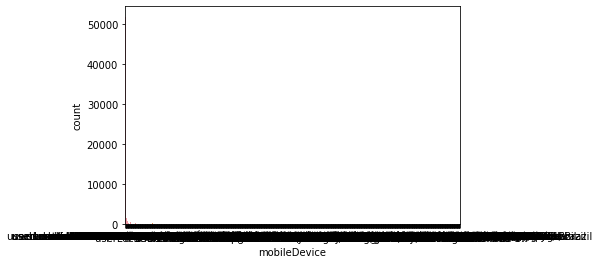

In [9]:
sns.countplot(train_data.mobileDevice);

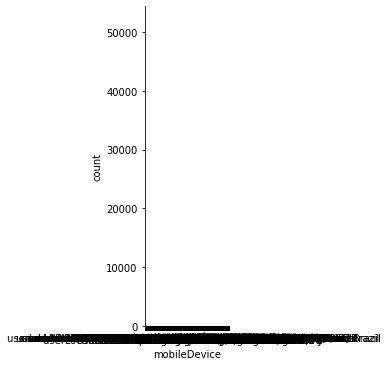

In [10]:
sns.catplot(x="mobileDevice", kind="count", palette="ch:.25", data=train_data)

In [1]:
%pwd

'/content'

In [40]:
f1 = (2*66.6*66.6)/(66.6+66.6)

In [41]:
f1

66.6

In [43]:
f2 = (2*60*100)/(60+100)
f2


75.0

In [44]:
f1p = (2*50*50)/(50+50)
f1p

50.0

In [45]:
P = 4/4
R = 4/4
f2p = (2*P*R)/(P+R)
f2p

1.0